In [1]:
pacman::p_load(dplyr,tidyverse,ggplot2,ncdf4)

In [2]:
ALL_EHUX = read.csv('/vortexfs1/omics/alexander/halexander/2020-Ehux/RCC-parsing/EHUX_all_strains.csv')
SELECTIONS = read.csv('/vortexfs1/omics/alexander/halexander/2020-Ehux/RCC-parsing/EHUX_Proposed_Strains.csv')
REVISED = read.csv('/vortexfs1/omics/alexander/halexander/2020-Ehux/RCC-parsing/REVISED-EHUX_Proposed_Strains.csv')

In [9]:
simple_frame = ALL_EHUX[,c("Latitude","Longitude","X")] %>%
    dplyr::filter(X %in% c("RCC6856","RCC6071","RCC1212","RCC3963",
                                                   "RCC874","CCMP1280","RCC4567","RCC914","RCC3492",
                                                   "CCMP371","RCC1215","CCMP377","RCC1239",
                                                   "RCC1222","RCC1256","CCMP74","CCMP379","CCMP1516",
                                                   "CCMP2090","CCMP375","RCC4567","CCMP371")) %>%
    dplyr::bind_rows(data.frame("X"=c("CCMP371","CCMP1280","CCMP375","CCMP377",
                                      "CCMP1516","CCMP2090","CCMP379","RCC4567","CCMP371"),
                                "Latitude"=c(32,-12,32,43,-2.67,-2.67,50.1669,-11.48,32),
                                "Longitude"=c(-62,-35,-62,-68,-82.72,-82.72,-4.2504,-25.05,-62)))

In [22]:
world_map <- map_data("world")

strain_color_frame_harriet = data.frame("Strains_full"=c("RCC6856","RCC6071","RCC1212","RCC3963",
                                                   "RCC874","CCMP1280","RCC4567","RCC914","RCC3492",
                                                   "CCMP371","RCC1215","CCMP377","RCC1239",
                                                   "RCC1222","RCC1256","CCMP374","CCMP379","CCMP1516",
                                                   "CCMP2090","CCMP375"),
                                        "Strains"=c("6856","6071","1212","3963",
                                                   "874","1280","4567","914","3492",
                                                   "371","1215","377","1239",
                                                   "1222","1256","374","379","1516",
                                                   "2090","375"),
                                        "Colors"=c("#4443c6","#c688ff","#7d328b","#da1b9d",
                                                  "#f87fa2","#b90033","#ff5755","#c31d0b",
                                                  "#ff6235","#ffc10c","#e4e366","#5a9f00",
                                                  "#60b574","#00b9bf","#0194e3","#C2C95E",
                                                  "#5EC9C9","#000000","#DBDBDB","dark green"))

map_plot = ggplot() +
  geom_polygon(world_map, mapping=aes(long, lat, group = group), fill = "light gray", colour = "transparent") + 
  coord_sf() + 
  #coord_sf(xlim = c(-85,-40), ylim = c(25,50)) + 
  geom_point(data = simple_frame, 
             mapping=aes(x = Longitude, y = Latitude, fill = X),pch=21,size=5)+
  theme_void(base_size=18) + theme(legend.position="bottom")+ 
  scale_fill_manual(breaks = strain_color_frame_harriet$Strains_full, 
                  values = strain_color_frame_harriet$Colors,name = "Strain")

Saving 6.67 x 6.67 in image


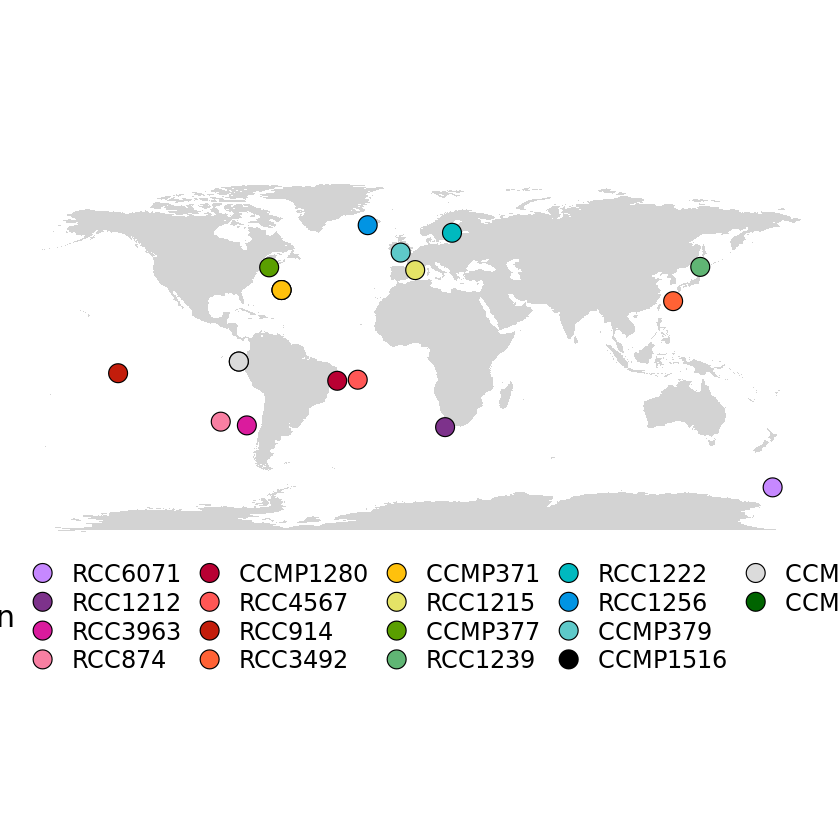

In [23]:
map_plot
ggsave("map_plot.pdf")

In [7]:
colnames(ALL_EHUX)

[1] "X"                            "Domain"                      
 [3] "Division"                     "Class"                       
 [5] "Order"                        "Family"                      
 [7] "Genus"                        "Cell.shape"                  
 [9] "Cell.motility"                "Sampling.ocean"              
[11] "Sampling.regional.sea"        "Sampling.country"            
[13] "Sampling.ecosystem"           "Isolation.by"                
[15] "Sampling.by"                  "Deposit.to.rcc.by"           
[17] "RCC.medium"                   "RCC.temperature"             
[19] "RCC.transfer.period.weeks"    "RCC.light"                   
[21] "Remark"                       "Sampling.date"               
[23] "Clonal"                       "Axenic"                      
[25] "Pure"                         "Heterotrophic"               
[27] "Toxic"                        "Symbiotic"                   
[29] "Transformed"                  "STRAIN.ID"                   
[31] "Latitude"                     "Longitude"                   
[33] "Sampling.site"                "Sampling.station"            
[35] "Isolation.method"             "Identification.method"       
[37] "Isolation.medium"             "Purification.by"             
[39] "Purification.method"          "Sampling.depth..m."          
[41] "Contaminant.type"             "Sampling.cruise"             
[43] "Sampling.temperature"         "Identification.by"           
[45] "Cell.assemblage"              "Date.entered.catalog"        
[47] "Host.type"                    "Host.genus"                  
[49] "Sampling.substrate"           "Isolation.growth.temperature"
[51] "Clade"                        "Deposit.to.RCC.date"         
[53] "Sampling.water.type"

In [20]:
ALL_EHUX %>% dplyr::select(X,RCC.temperature,Latitude,Longitude)%>%
    dplyr::filter(X %in% c("RCC6856","RCC6071","RCC1212","RCC3963",
                                                   "RCC874","CCMP1280","RCC4567","RCC914","RCC3492",
                                                   "CCMP371","RCC1215","CCMP377","RCC1239",
                                                   "RCC1222","RCC1256","CCMP74","CCMP379","CCMP1516",
                                                   "CCMP2090","CCMP375"))%>%
    dplyr::bind_rows(data.frame("X"=c("CCMP371","CCMP1280","CCMP375","CCMP377","CCMP1516/2090","CCMP379"),
                                "Latitude"=c(32,-12,32,43,-2.67,50.17),
                                "Longitude"=c(-62,-35,-62,-68,-82.72,-4.25), # deposit date is used if sampling unavailable
                                "SamplingYear"=c(1987,1990,1967,1988,1992,NA),
                                "SamplingMonth"=c(6,10,2,9,9,NA)))

other_isolation_dates = data.frame("X"=c("RCC874","RCC914","RCC1212","RCC1215","RCC1222",
                                         "RCC1239","RCC1256","RCC3492","RCC3963","RCC6071"),
                                   "SamplingYear"=c(2004,2004,2000,2001,1998,2002,1999,2011,
                                                    2011,2018),
                                   "SamplingMonth"=c(11,10,9,2,7,4,7,12,10,3),
                                   "SamplingDepth"=c(5,10,3,NA,20,NA,NA,0,NA,10),
                                   "SamplingTemp"=c(NA,27.78,NA,NA,NA,NA,NA,NA,NA,NA))

sample_t_frame = ALL_EHUX %>% dplyr::select(X,RCC.temperature,Latitude,Longitude)%>%
    dplyr::filter(X %in% c("RCC6856","RCC6071","RCC1212","RCC3963",
                                                   "RCC874","CCMP1280","RCC4567","RCC914","RCC3492",
                                                   "CCMP371","RCC1215","CCMP377","RCC1239",
                                                   "RCC1222","RCC1256","CCMP74","CCMP379","CCMP1516",
                                                   "CCMP2090","CCMP375"))%>%
    dplyr::left_join(other_isolation_dates,by=c("X"))%>%
    dplyr::bind_rows(data.frame("X"=c("CCMP371","CCMP1280","CCMP375","CCMP377","CCMP1516/2090","CCMP379"),
                                "Latitude"=c(32,-12,32,43,-2.67,50.17),
                                "Longitude"=c(-62,-35,-62,-68,-82.72,-4.25), # deposit date is used if sampling unavailable
                                "SamplingYear"=c(1987,1990,1967,1988,1992,NA),
                                "SamplingMonth"=c(6,10,2,9,9,NA),
                                "SamplingTemp"=c(NA,NA,NA,NA,NA,NA)))

sample_t_frame

X,RCC.temperature,Latitude,Longitude,SamplingYear,SamplingMonth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RCC874,17,-31.82,-91.47,NA,NA
RCC914,17,-8.33,-141.25,NA,NA
RCC1212,17,-34.47,17.30,NA,NA
RCC1215,17,41.67,2.80,NA,NA
RCC1222,17,59.77,20.64,NA,NA
RCC1239,17,43.22,141.02,NA,NA
RCC1256,17,63.45,-20.23,NA,NA
RCC3492,22,26.61,127.87,NA,NA
RCC3963,15,-33.63,-78.82,NA,NA


X,RCC.temperature,Latitude,Longitude,SamplingYear,SamplingMonth,SamplingDepth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RCC874,17,-31.82,-91.47,2004,11,5
RCC914,17,-8.33,-141.25,2004,10,10
RCC1212,17,-34.47,17.30,2000,9,3
RCC1215,17,41.67,2.80,2001,2,NA
RCC1222,17,59.77,20.64,1998,7,20
RCC1239,17,43.22,141.02,2002,4,NA
RCC1256,17,63.45,-20.23,1999,7,NA
RCC3492,22,26.61,127.87,2011,12,0
RCC3963,15,-33.63,-78.82,2011,10,NA


Warning message:
“Width not defined
ℹ Set with `position_dodge(width = ...)`”


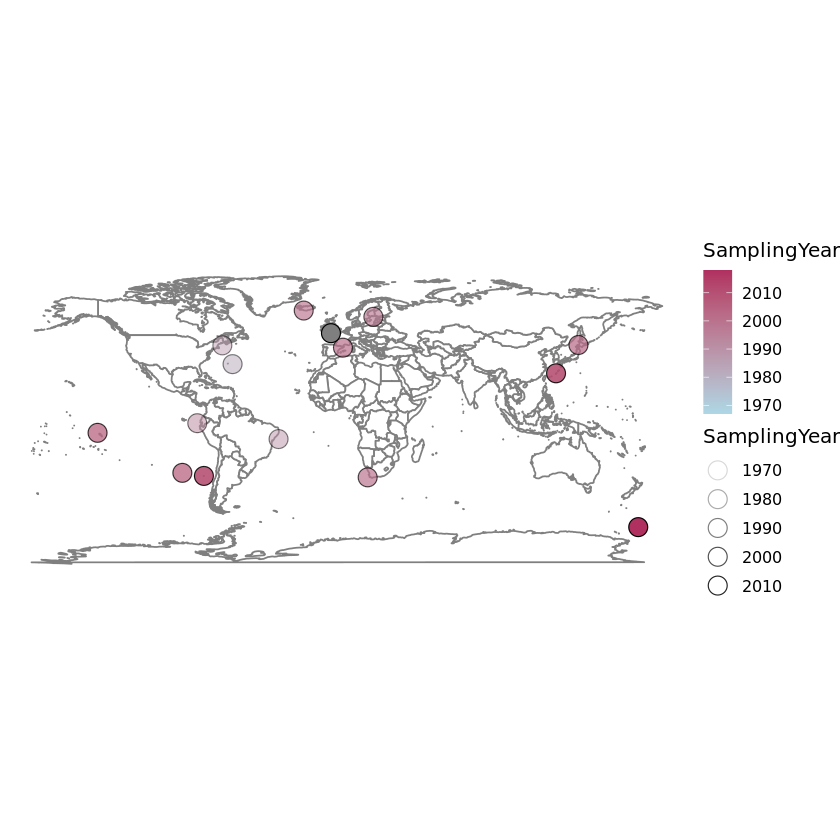

In [47]:
map_sample = ggplot() +
  geom_polygon(world_map, mapping=aes(long, lat, group = group), fill = "white", colour = "grey50") + 
  coord_sf() + 
  #coord_sf(xlim = c(-85,-40), ylim = c(25,50)) + 
  geom_point(data = sample_t_frame, 
             mapping=aes(x = Longitude, y = Latitude, fill = SamplingYear, alpha=SamplingYear),
             pch=21,size=5,position="dodge")+
  theme_void(base_size=12) + theme(legend.position="right") + 
  scale_fill_gradient(low="light blue",high="maroon")
map_sample



In [40]:
sample_t_frame

X,RCC.temperature,Latitude,Longitude,SamplingYear,SamplingMonth,SamplingDepth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RCC874,17,-31.82,-91.47,2004,11,5
RCC914,17,-8.33,-141.25,2004,10,10
RCC1212,17,-34.47,17.30,2000,9,3
RCC1215,17,41.67,2.80,2001,2,NA
RCC1222,17,59.77,20.64,1998,7,20
RCC1239,17,43.22,141.02,2002,4,NA
RCC1256,17,63.45,-20.23,1999,7,NA
RCC3492,22,26.61,127.87,2011,12,0
RCC3963,15,-33.63,-78.82,2011,10,NA


In [42]:
## monthly SST data from 1980-present from NOAA -> https://downloads.psl.noaa.gov/Datasets/COBE/
ncin <- nc_open("sst.mon.mean.nc")

In [45]:
# get longitude and latitude
lon <- ncvar_get(ncin,"lon")
nlon <- dim(lon)

lat <- ncvar_get(ncin,"lat")
nlat <- dim(lat)

In [44]:
print(ncin)

File sst.mon.mean.nc (NC_FORMAT_NETCDF4_CLASSIC):

     1 variables (excluding dimension variables):
        float sst[lon,lat,time]   (Chunking: [360,180,1])  (Compression: shuffle,level 2)
            long_name: Monthly Means of Global Sea Surface Temperature
            valid_range: -5
             valid_range: 40
            units: degC
            missing_value: 1.00000002004088e+20
            var_desc: Sea Surface Temperature
            dataset: COBE Sea Surface Temperature
            level_desc: Surface
            statistic: Mean
            parent_stat: Individual obs
            actual_range: -1.79999959468842
             actual_range: 34.8699989318848

     3 dimensions:
        lon  Size:360 
            units: degrees_east
            long_name: Longitude
            actual_range: 0.5
             actual_range: 359.5
            axis: X
            standard_name: longitude
        lat  Size:180 
            units: degrees_north
            long_name: Latitude
         